In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/combined_tweets.csv')

In [ ]:
df.head()

,id,created_at,edit_history_tweet_ids,text,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,likes,retweets,hour,source,article.title
0,1969868394645028959,2025-09-21 20:56:38+00:00,['1969868394645028959'],Three goals and three points for Barça! 🦈\n\nW...,1054,528,22840,27,70,763639,22840,1054,20,Midterm\fabrizio,NaN
1,1969866193390436384,2025-09-21 20:47:53+00:00,['1969866193390436384'],🔵🔴 Two goals and two assists for Marcus Rashfo...,3662,764,71946,172,363,1529509,71946,3662,20,Midterm\fabrizio,NaN
2,1969839888527761900,2025-09-21 19:03:21+00:00,['1969839888527761900'],🚨💙 Pep Guardiola: “Arsenal are a team that hav...,1446,502,28760,38,195,1443836,28760,1446,19,Midterm\fabrizio,NaN
3,1969837601206255973,2025-09-21 18:54:16+00:00,['1969837601206255973'],❤️🤍 Mikel Arteta: “Gabriel Martinelli probably...,2214,587,44111,180,252,1329259,44111,2214,18,Midterm\fabrizio,NaN
4,1969836832658428156,2025-09-21 18:51:13+00:00,['1969836832658428156'],❤️🤍 Arteta: “I’m very proud of the team. We do...,1210,1245,23717,380,177,1659164,23717,1210,18,Midterm\fabrizio,NaN


In [ ]:
df['tweet_length'] = df['text'].astype(str).apply(len)

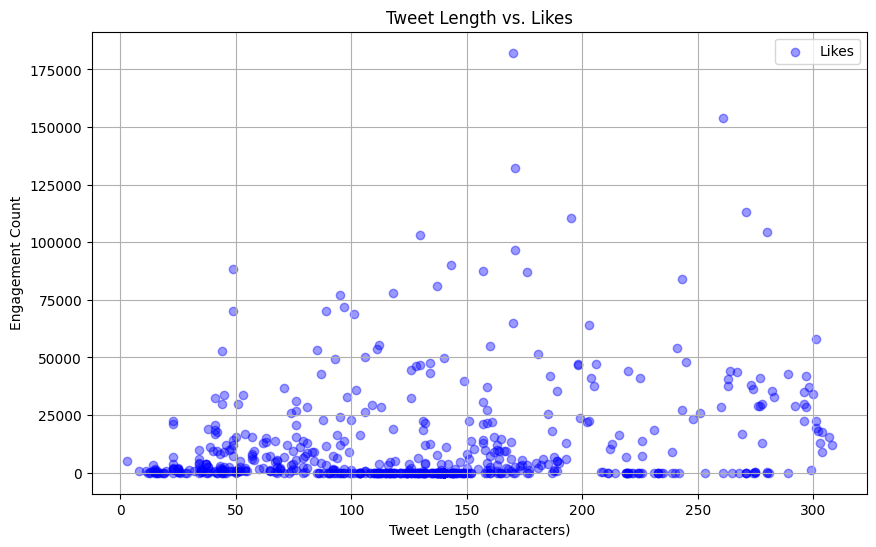

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['tweet_length'], df['likes'], alpha=0.4, label='Likes', color='blue')

plt.xlabel("Tweet Length (characters)")
plt.ylabel("Engagement Count")
plt.title("Tweet Length vs. Likes")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
likes_corr = df['tweet_length'].corr(df['likes'])


print(f"Correlation with Likes: {likes_corr:.3f}")

Correlation with Likes: 0.237


In [ ]:
df['tweet_length_mean']=df['tweet_length'].mean()

In [ ]:
# Define groups
short_tweets = df[df['tweet_length'] <= df['tweet_length_mean']]
long_tweets = df[df['tweet_length'] > df['tweet_length_mean']]


In [ ]:
from scipy.stats import ttest_ind

t_likes = ttest_ind(long_tweets['likes'], short_tweets['likes'], equal_var=False,alternative ='greater')

print(f"T-test for Likes → t-statistic: {t_likes.statistic:.5f}, p-value: {t_likes.pvalue:.5f}")

T-test for Likes → t-statistic: 3.62649, p-value: 0.00016


Based on the t-tests, we reject the null hypothesis and accept the alternative:
There is a statistically significant difference in engagement between short and long tweets.
Specifically, longer tweets receive more likes and retweets on average than shorter ones.

